## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from scipy import stats
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier


## Reading Data

In [2]:
data = pd.read_csv('./data/starcraft_player_data.csv')
data.head(20)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


In [3]:
data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

(None, (3395, 20))

## Data Preprocessing

In [4]:
# Removing GameID as it does not contribute to EDA or model building

data = data.drop(['GameID'], axis=1)

In [5]:
"""
Age, HoursPerWeek, TotalHours have object datatype instead of int64 or float64
Investigating the data further

I notice that these columns have "?" in them instead of Nan values
"""

# Iterate over columns with non-numeric data types
for column in data.select_dtypes(include='object').columns:
    unique_values = data[column].unique()

    # Check if there are any non-numeric values
    non_numeric_values = [value for value in unique_values if not str(value).isnumeric()]
    print(column + ":", ', '.join(map(str, non_numeric_values)))


Age: ?
HoursPerWeek: ?
TotalHours: ?


In [6]:
"""
Investigating the Age, HoursPerWeek, TotalHours column

Analysis: We notice that we have missing values for only LeagueIndex 8 which is professial league.

We can either drop these rows because they are only 1.67% of the data or  imputing them with mean or median values.
SInce these players are professional players and their age, hours per week and total hours will be very different from the rest of the players but 
an estimation can be made that these values will be close to League 7 players.

We could also drop these columns as they are a small percentage of the data and that the players can have only league indexes between 1-7 (Bronze to Grandmaster) according to the game rules.
55 rows have league index 8 is not sufficent to classify professional players. But in this case we will impute the values with mean values.

"""

# Check if any of the three columns have the value "?"
mask = (data['Age'] == "?") | (data['HoursPerWeek'] == "?") | (data['TotalHours'] == "?")
result = data[mask]

result


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


In [7]:
# Replace "?" with NaN

data = data.replace("?", np.nan)

# Convert Age, HoursPerWeek, TotalHours to numeric
for column in data.select_dtypes(include='object').columns:
    data[column] = pd.to_numeric(data[column])
    

In [8]:
"""
After researching for some historical data, I found that mean age of a professional player is ~22 (22.08) years.
Thus imputing the missing values with 22 for Age column where LeagueIndex is 8.
"""

# Imputing missing values with 22

data.loc[(data['Age'].isnull()) & (data['LeagueIndex'] == 8), 'Age'] = 22

In [9]:
"""
Obvsiouly, the professional players will have more hours per week than the rest of the players. 
So we can impute the missing values with the mean of LeagueIndex 7 players as an estimation.

Similar assumption can be made for TotalHours column.
"""

# Imputing missing values for HoursPerWeek with mean of LeagueIndex 7

data.loc[(data['HoursPerWeek'].isnull()) & (data['LeagueIndex'] == 8), 'HoursPerWeek'] = data.loc[data['LeagueIndex'] == 7, 'HoursPerWeek'].mean()


# Imputing missing values for TotalHours with mean of LeagueIndex 7

data.loc[(data['TotalHours'].isnull()) & (data['LeagueIndex'] == 8), 'TotalHours'] = data.loc[data['LeagueIndex'] == 7, 'TotalHours'].mean()



In [10]:
"""
For the missing values in LeagueIndex 5 we can just take the mean of LeagueIndex 5 players and impute the missing values.
"""

# Imputing missing values for HoursPerWeek with mean of LeagueIndex 5

data.loc[(data['HoursPerWeek'].isnull()) & (data['LeagueIndex'] == 5), 'HoursPerWeek'] = data.loc[data['LeagueIndex'] == 5, 'HoursPerWeek'].mean()
data.loc[(data['TotalHours'].isnull()) & (data['LeagueIndex'] == 5), 'TotalHours'] = data.loc[data['LeagueIndex'] == 5, 'TotalHours'].mean()


In [11]:
#Check for missing values

data.isnull().sum()

LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [12]:
data.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4.184094,21.653608,16.166854,971.102668,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,1.517327,4.172356,12.030446,17172.292663,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


Observation: Everything looks normal but the max value for TotalHours is 1M. We will have to look into it.

In [13]:
"""
ComplexUnitsMade and ComplexAbilityUsed have a lot of 0 values. We can further investigate this by plotting a histogram
"""

# Calculate the fraction of zero values for each column
fraction_zeros = (data == 0).mean()

# Filter rows where the fraction of zeros is not equal to 0
filtered_fraction_zeros = fraction_zeros[fraction_zeros != 0]

# Convert fraction values to percentages
percentage_zeros = filtered_fraction_zeros * 100

# Create a DataFrame with the percentage of zero values
df_percentage_zeros = pd.DataFrame({'Column Name': percentage_zeros.index, '% of 0s': percentage_zeros.values})

print("DataFrame: Percentage of zero values in each column")

df_percentage_zeros


DataFrame: Percentage of zero values in each column


,Column Name,% of 0s
0,HoursPerWeek,0.029455
1,SelectByHotkeys,0.471281
2,AssignToHotkeys,0.176730
3,UniqueHotkeys,5.567010
4,MinimapAttacks,25.832106
5,MinimapRightClicks,2.120766
6,ComplexUnitsMade,67.187040
7,ComplexAbilitiesUsed,45.714286


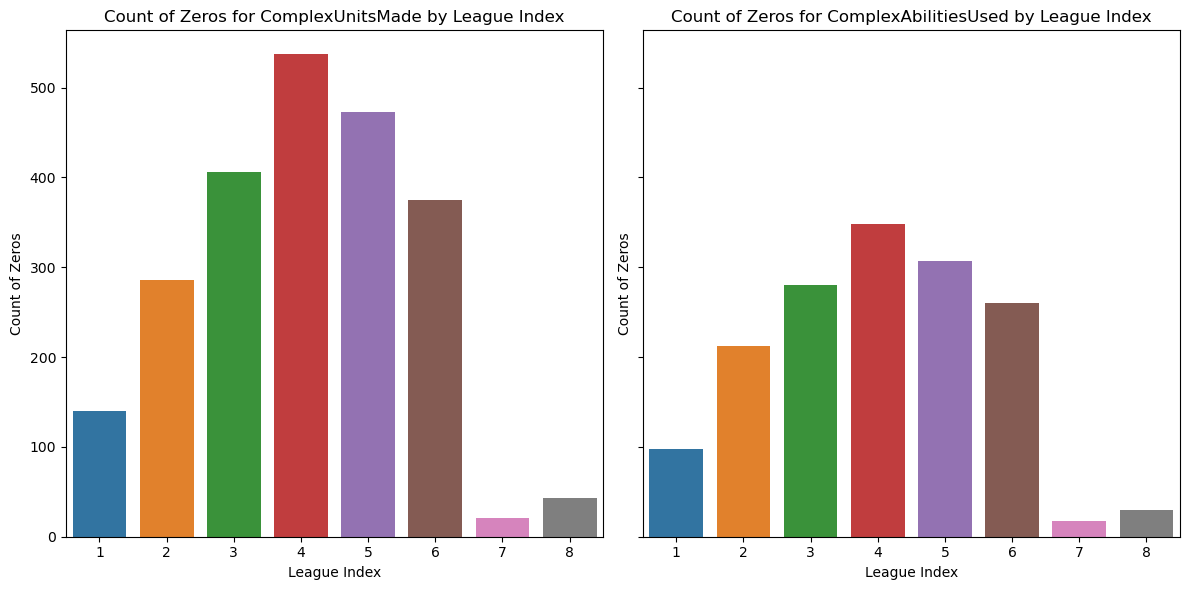

In [14]:
columns = ['ComplexUnitsMade', 'ComplexAbilitiesUsed']
titles = ['ComplexUnitsMade', 'ComplexAbilitiesUsed']

fig, axes = plt.subplots(1, len(columns), figsize=(12, 6), sharey=True)

# Iterate over the columns and create countplots
for i, column in enumerate(columns):
    # Filter the data for zeros in the current column
    zero_values = data[data[column] == 0]
    
    # Create the countplot in the corresponding subplot
    sns.countplot(x='LeagueIndex', data=zero_values, ax=axes[i])
    axes[i].set_title(f'Count of Zeros for {titles[i]} by League Index')
    axes[i].set_xlabel('League Index')
    axes[i].set_ylabel('Count of Zeros')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

In [15]:
"""
Investigating TotalHours column because 1 player has 1M hours (114years) which is not possible. This leads to checking if any other playes have
their age lesser than than their total hours.

Removing player where their age is less than their TotalHours
"""

# check if the age of any player is less than their total hours where age is in years and total hours is in hours

mask = data['Age'] < (data['TotalHours'] / 8760)
result = data[mask].copy()

# adding new column with total hours in years to results dataframe next to age column
result['TotalHoursInYears'] = result['TotalHours'] / 8760

column_order = ['LeagueIndex','Age', 'TotalHoursInYears']
result = result[column_order]


result

,LeagueIndex,Age,TotalHoursInYears
1793,5,18.0,114.155251


In [16]:
# remove player with age less than total hours

data = data[data['Age'] >= (data['TotalHours'] / 8760)] 

## Exploratory Data Analysis

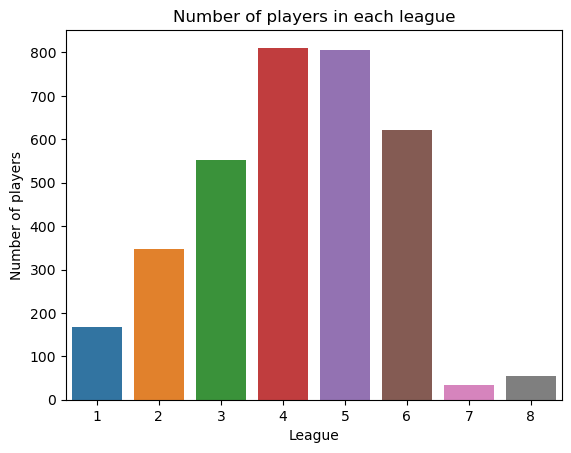

In [17]:
# barplot of the number of players in each league
sns.countplot(x='LeagueIndex', data=data)
plt.xlabel('League')
plt.ylabel('Number of players')
plt.title('Number of players in each league')
plt.show()

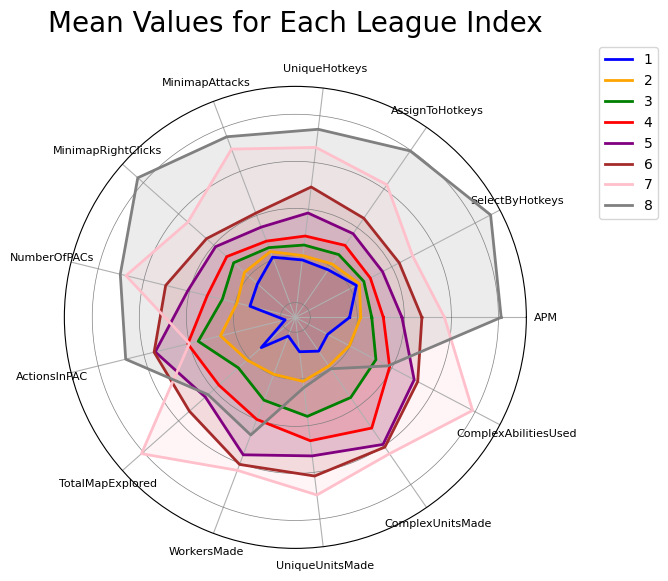

In [18]:

scaler = StandardScaler()

# Select the columns to keep in the radar chart
selected_columns = ['LeagueIndex','APM', 'SelectByHotkeys',
       'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed']

# Calculate the mean of the selected columns for each LeagueIndex
selected_mean_values = data[selected_columns].groupby('LeagueIndex').mean().reset_index()

# Define the properties for the radar chart
labels=np.array(selected_mean_values.columns[1:])
num_vars = len(labels)

# Compute angle for each axis in the plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circle, so we need to "complete the loop" and append the start value to the end.
angles += angles[:1]

# Scale the selected mean values to a uniform scale
scaled_selected_mean_values = pd.DataFrame(scaler.fit_transform(selected_mean_values.iloc[:, 1:]), 
                                           columns=selected_mean_values.columns[1:], 
                                           index=selected_mean_values['LeagueIndex'])

# Prepare the figure again
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Add each LeagueIndex to the radar chart again
for league_index, color in zip(scaled_selected_mean_values.index, ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']):
    values = scaled_selected_mean_values.loc[league_index].values.flatten().tolist()
    values += values[:1]
    ax.fill(angles, values, color=color, alpha=0.15)
    ax.plot(angles, values, color=color, linewidth=2, label=league_index)

# Set the ytick labels to be empty, adjust the grid and set the xtick labels
ax.set_yticklabels([])
ax.grid(axis='y', color='gray', linewidth=0.5)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=8)

# Add legend and title
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Mean Values for Each League Index', size=20, y=1.1)

plt.show()

Observation: We can observe from the radar plot that how the mean values of selected features vary for different LeagueIndex. It becomes very clear that the players with higher LeagueIndex have higher mean values overall.

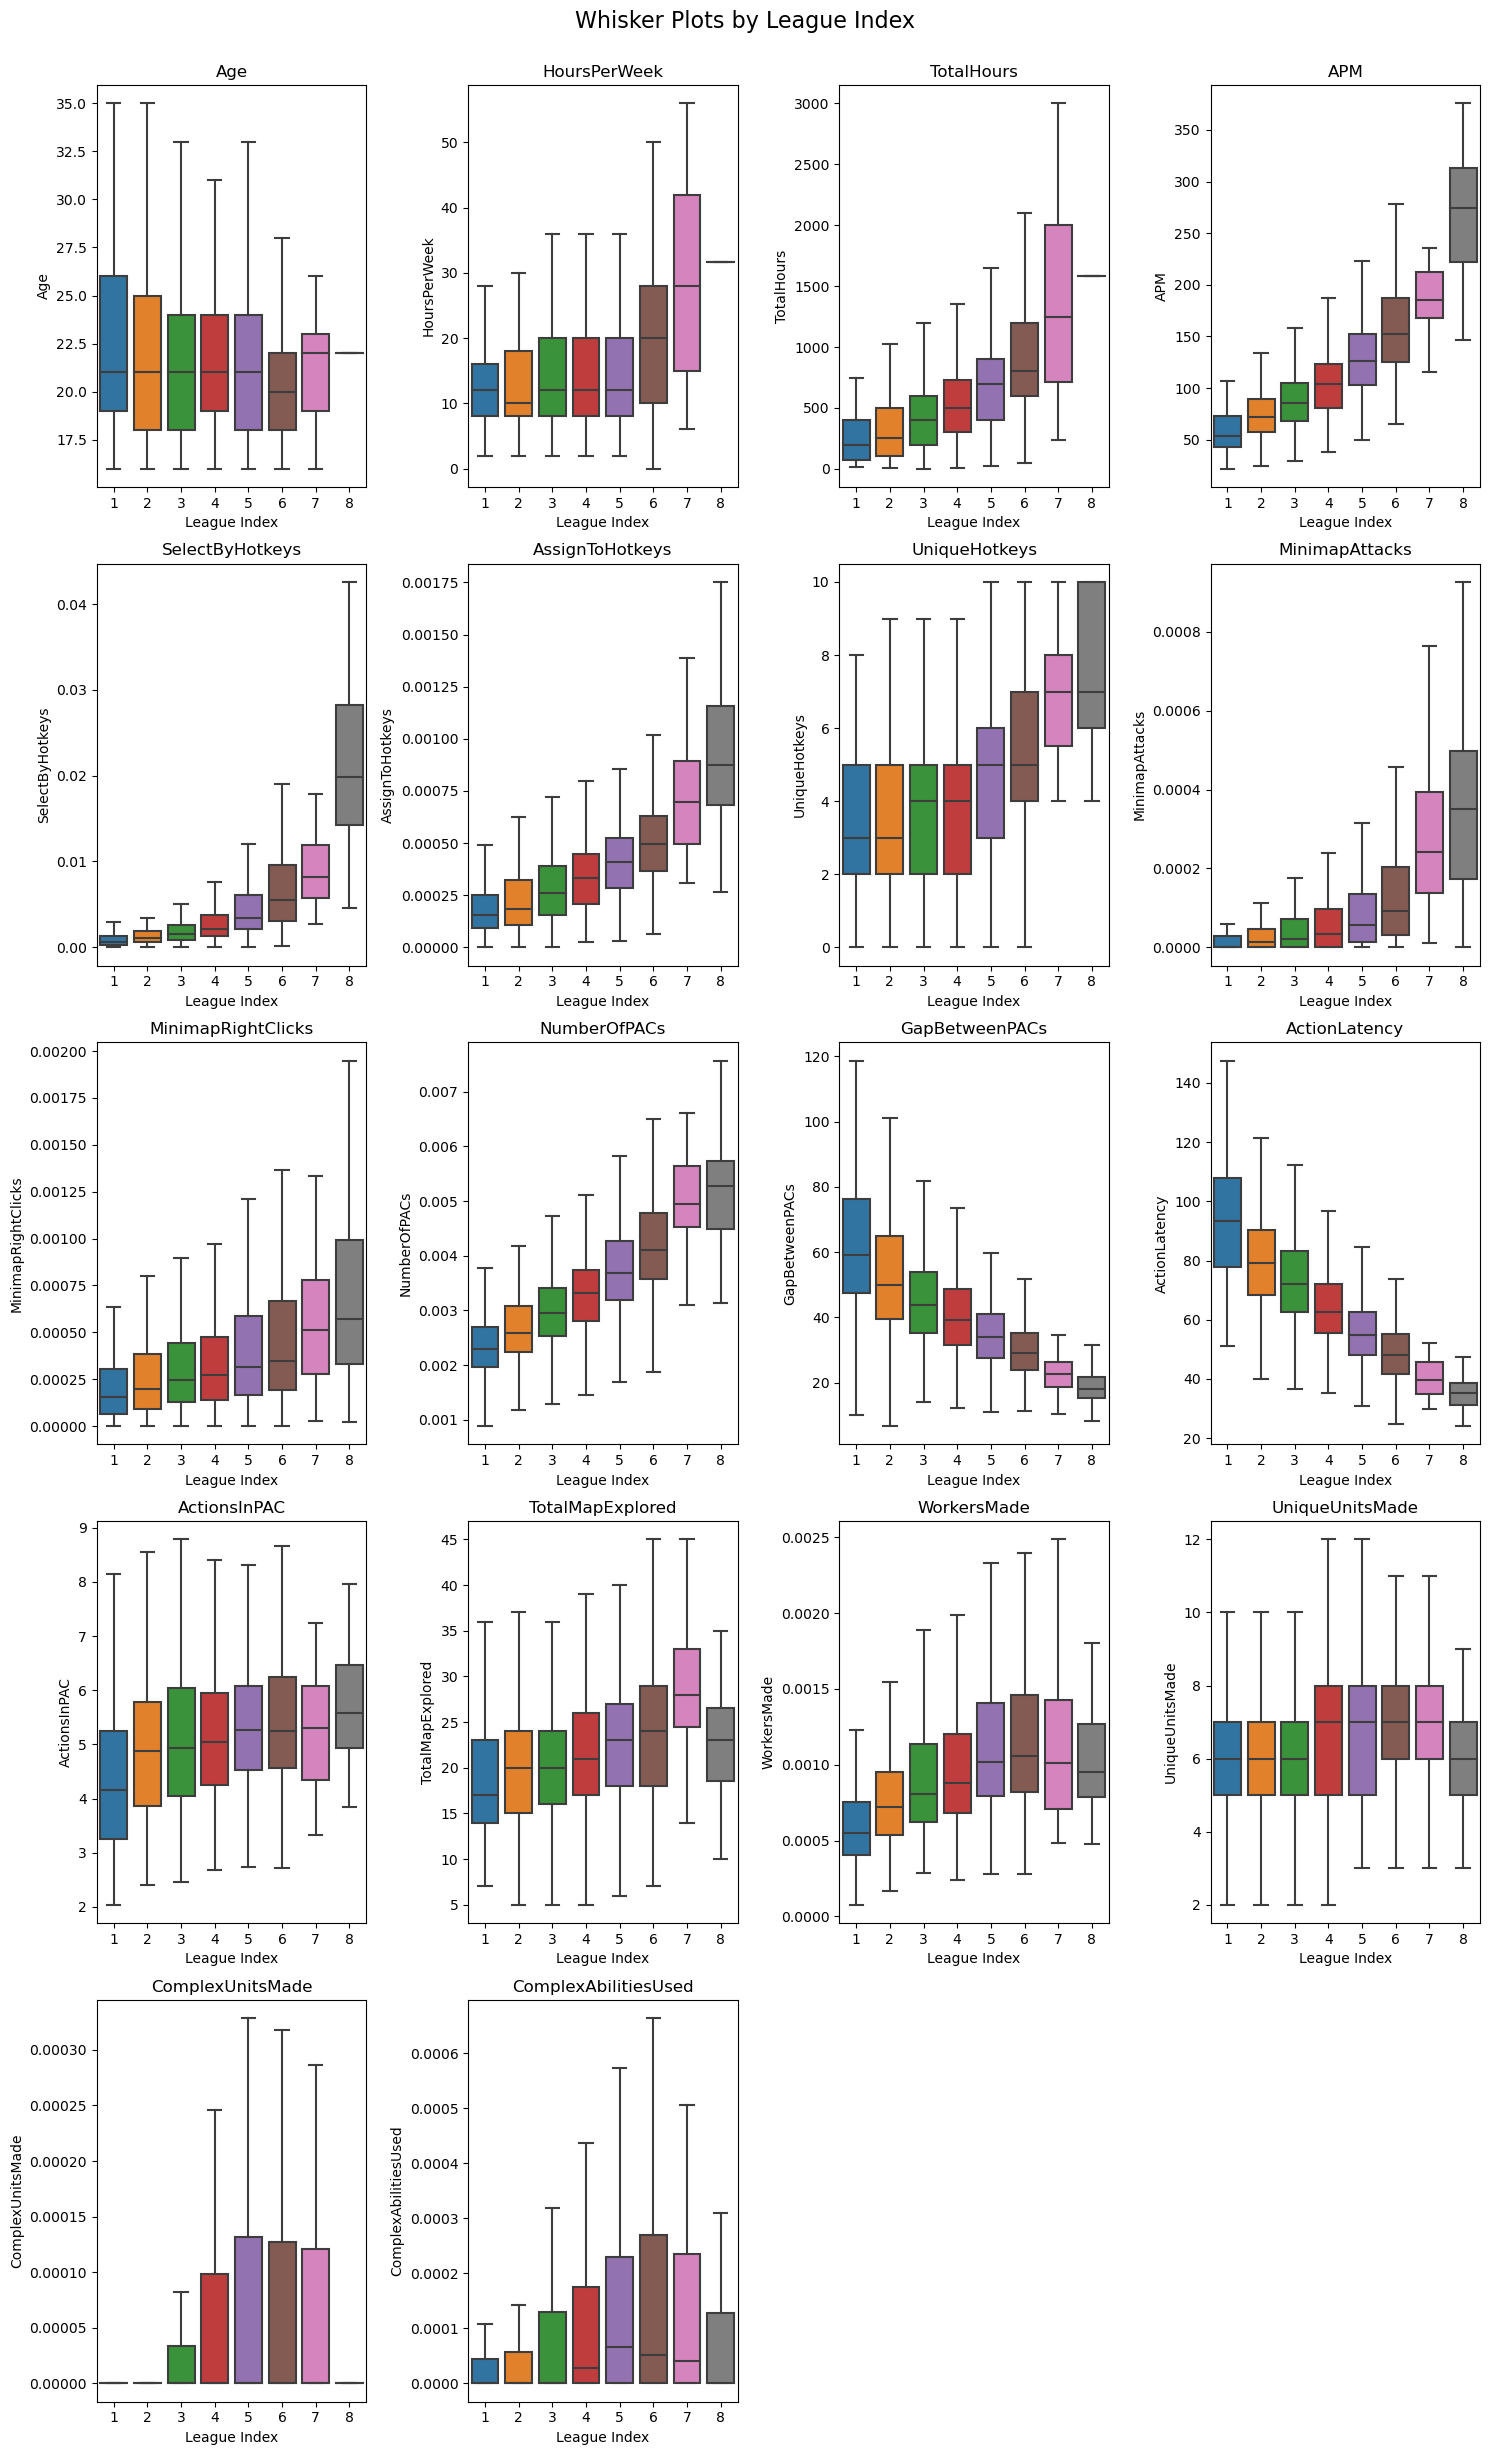

In [19]:
# Get the list of non-'LeagueIndex' columns
columns = [col for col in data.columns if col != 'LeagueIndex']

# Calculate the number of rows and columns for the subplot grid
num_columns = len(columns)
num_rows = (num_columns - 1) // 4 + 1
num_cols = min(num_columns, 4)

# Set up the subplot grid dynamically
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle('Whisker Plots by League Index', fontsize=16)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the columns and create whisker plots in subplots
for i, column in enumerate(columns):
    # Select the current axis for the subplot
    ax = axes[i]

    # Create the whisker plot for the current column
    sns.boxplot(x='LeagueIndex', y=column, data=data, ax=ax, showfliers=False)
    ax.set_title(f"{column}")
    ax.set_xlabel('League Index')
    ax.set_ylabel(column)

# Hide empty subplots if any
for j in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.95)


# Display the subplot grid
plt.show()

Observations:

* Age is almost the same for the League Index. We can say that age might not be a good feature to predict the League Index 

* For the other features, we can see that the mean values for the higher League Index are higher than the lower League Index(Ex: APM, NumberofPACs). While the features where lesser value means better performance, the mean values for the higher League Index are lower than the lower League Index (Ex: Action Latency, GapBetweenPACs). We can say that these features might be good predictors for the League Index. 

Lets perform Anova test to confirm our observations.

In [20]:
# Perform ANOVA test 

pvals_df = pd.DataFrame(columns=['column', 'fval', 'pval','signficant'])

for col in data.columns:
    if col == 'LeagueIndex':
        continue
    grp1 = data[col][data['LeagueIndex'] == 1]
    grp2 = data[col][data['LeagueIndex'] == 2]
    grp3 = data[col][data['LeagueIndex'] == 3]
    grp4 = data[col][data['LeagueIndex'] == 4]
    grp5 = data[col][data['LeagueIndex'] == 5]
    grp6 = data[col][data['LeagueIndex'] == 6]
    grp7 = data[col][data['LeagueIndex'] == 7]
    grp8 = data[col][data['LeagueIndex'] == 8]

    fval, pval = stats.f_oneway(grp1, grp2, grp3, grp4, grp5, grp6, grp7, grp8)
    if pval > 0.05:
        just_significant = "Accept Null Hypothesis"
    else:
        just_significant = "Reject Null Hypothesis"

    pvals_new = pd.DataFrame({'column': [col], 'fval': [fval], 'pval': [pval], 'signficant': [just_significant]})
    pvals_df = pd.concat([pvals_df, pvals_new], ignore_index=True)

pvals_df


,column,fval,pval,signficant
0,Age,9.396244,1.376578e-11,Reject Null Hypothesis
1,HoursPerWeek,51.969636,9.795249e-71,Reject Null Hypothesis
2,TotalHours,50.991345,2.072413e-69,Reject Null Hypothesis
3,APM,439.438068,0.000000e+00,Reject Null Hypothesis
4,SelectByHotkeys,231.944335,2.094835e-282,Reject Null Hypothesis
5,AssignToHotkeys,224.287533,1.604479e-274,Reject Null Hypothesis
6,UniqueHotkeys,76.046291,1.069252e-102,Reject Null Hypothesis
7,MinimapAttacks,70.147537,5.527755e-95,Reject Null Hypothesis
8,MinimapRightClicks,31.506552,1.352818e-42,Reject Null Hypothesis
9,NumberOfPACs,300.241760,0.000000e+00,Reject Null Hypothesis


Null Hypothesis would be that the the group mean are equale and there is no variation.

Observation: Surprisingly, Age is a significant feature along with the other features although the variation is not that different in each league. Thus we should not drop it and use it in our model. 

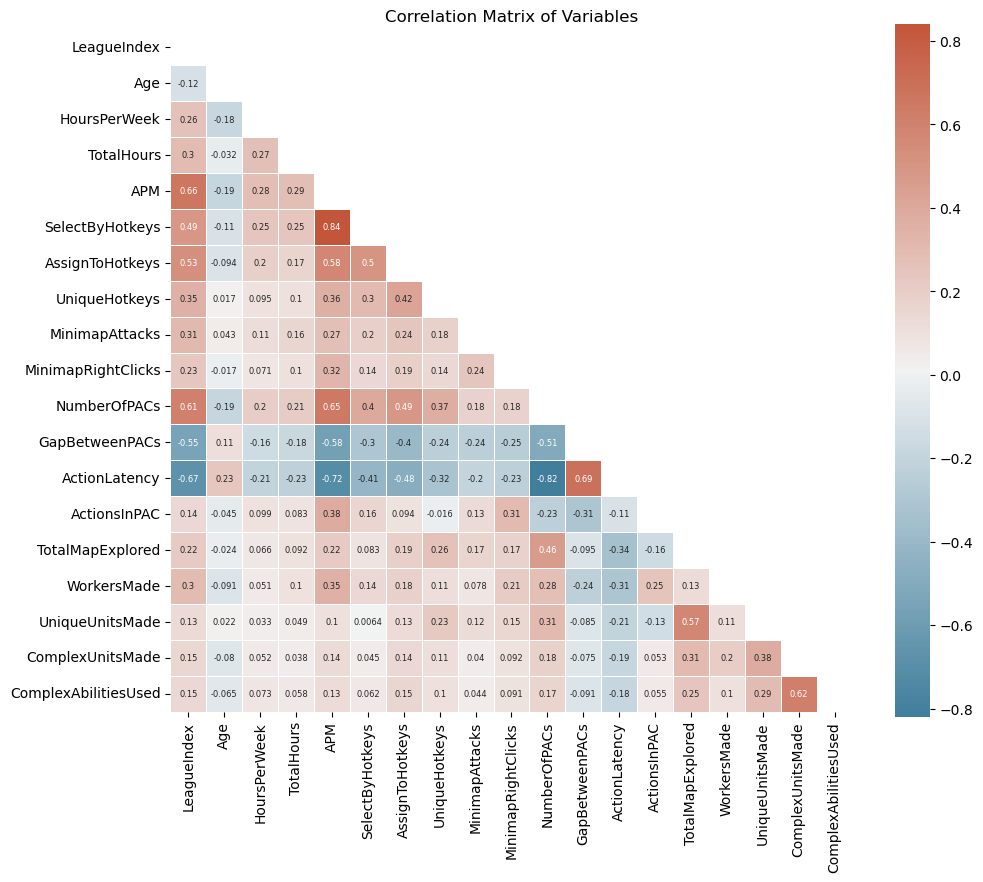

In [21]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, annot=True, annot_kws={"size": 6})
plt.title('Correlation Matrix of Variables')
plt.show()

Observations:

Corr>0.3 and Corr<-0.3 are relevant correlations.


* <b>APM (Actions Per Minute)</b> has a high positive correlation with LeagueIndex, indicating that players with higher skill levels tend to have higher APMs.

* <b>SelectByHotkeys, AssignToHotkeys, UniqueHotkeys</b> also have a positive correlation with LeagueIndex, suggesting that higher-skilled players tend to use hotkeys more often than clicking on the mouse. This makes sense, as using hotkeys is much faster than clicking on the mouse.

* <b>NumberOfPACs</b> has a positive correlation with LeagueIndex, a higher Perception Action Cycle (PACs) number gives an example of multitasking or good skill, and ultimately set a difference in between different leagues.

* <b>ActionLatency</b> has a negative correlation with LeagueIndex, meaning that higher-skilled players tend to have lower action latencies.
<b>GapBetweenPACs</b> also shows a negative correlation with LeagueIndex, indicating that higher-skilled players have less time between Perception Action Cycles.

* <b>APM</b> and <b>NumberofPACs</b> have a high positive correlation with each other, indicating that higher-skilled players tend to have higher APMs and higher PACs.

Let's explore APM and NumberofPACs further.

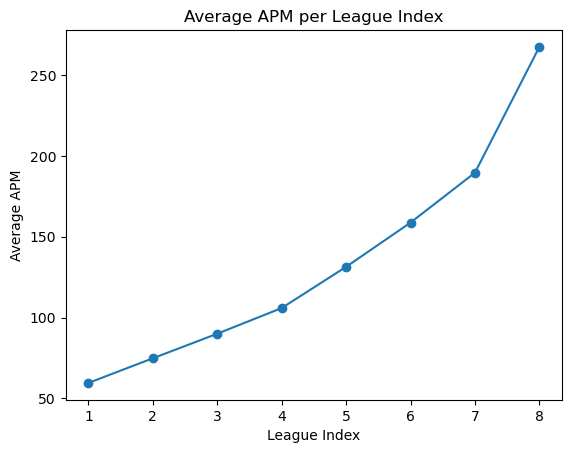

In [22]:
# Create a line chart of average APM for each league index

average_apm = data.groupby('LeagueIndex')['APM'].mean().reset_index()

plt.plot(average_apm['LeagueIndex'], average_apm['APM'], marker='o')
plt.title('Average APM per League Index')
plt.xlabel('League Index')
plt.ylabel('Average APM')
plt.xticks(average_apm['LeagueIndex'])
plt.show()


Observation:
It is evident that the players with higher APM are in the higher league index. Let's see if we can find any other interesting patterns with game dependent variables like WorkersMade, UniqueUnitsMade, etc.

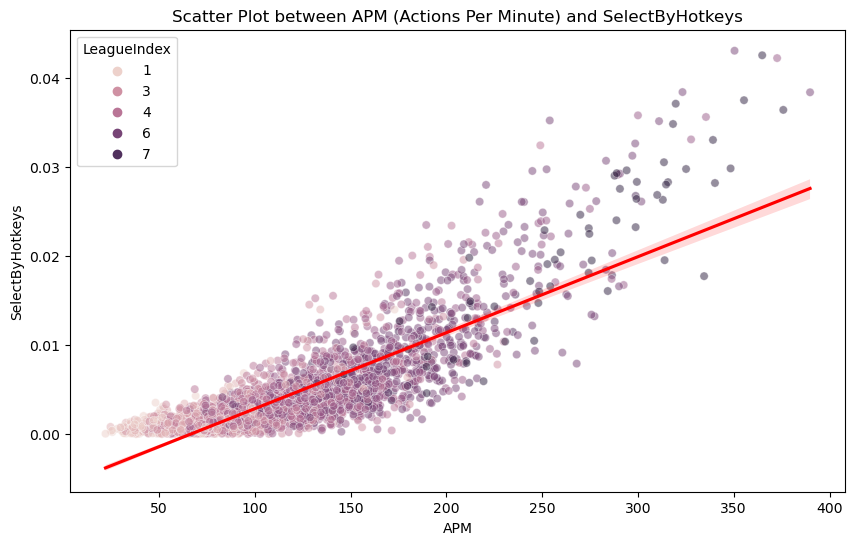

In [23]:
# Plot a scatter plot between APM and SelectByHotkeys
plt.figure(figsize=(10, 6))
sns.scatterplot(x='APM', y='SelectByHotkeys', data=data, hue='LeagueIndex', alpha=0.5)
sns.regplot(x='APM', y='SelectByHotkeys', data=data, scatter=False, color='red')

plt.title('Scatter Plot between APM (Actions Per Minute) and SelectByHotkeys')
plt.show()

Observation: Clearly there is positive correlation between APM and SelectByHotkeys. This means that players with higher APM tend to use hotkeys more often than clicking on the mouse.

Text(0.5, 1.0, 'Scatter Plot between APM (Actions Per Minute) and TotalUnitsMade')

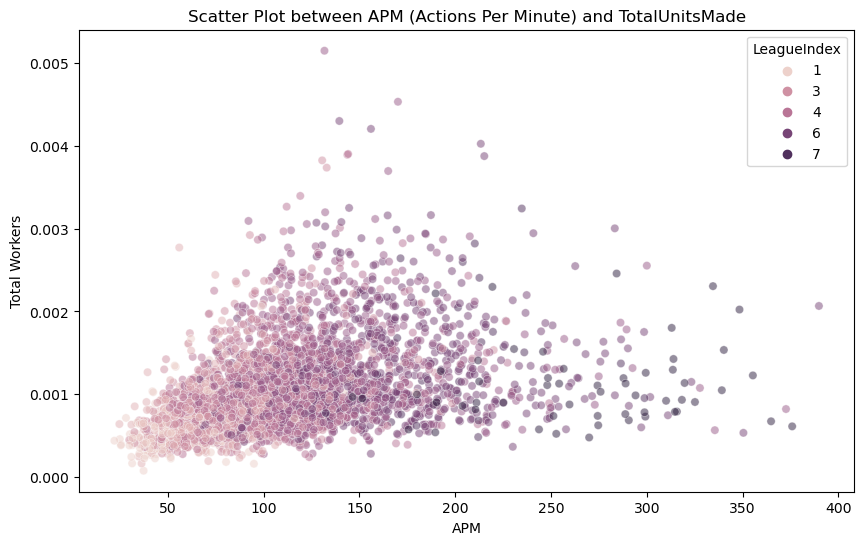

In [24]:
# Plot a scatter plot between APM and (WorkersMade+ComplexUnitsMade)

total_workers = data['WorkersMade'] + data['ComplexUnitsMade']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='APM', y=total_workers, data=data, hue='LeagueIndex', alpha=0.5)
plt.ylabel('Total Workers')
plt.title('Scatter Plot between APM (Actions Per Minute) and TotalUnitsMade')

Observation: There is no clear pattern between APM and Total Workers made. This could be because of the fact that the number of workers made is dependent on the strategy of the player and not on the skill level.

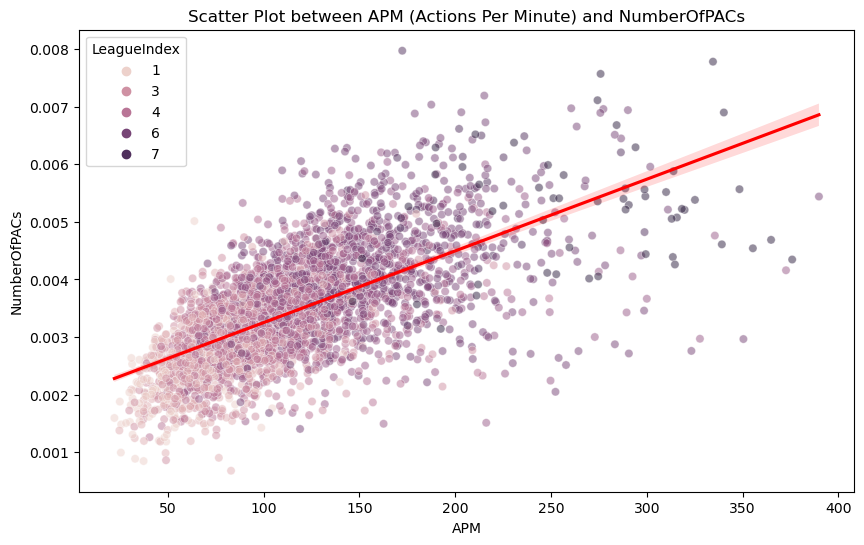

In [25]:
# Plot a scatter plot between APM and NumberOfPACs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='APM', y='NumberOfPACs', data=data, hue='LeagueIndex', alpha=0.5)
sns.regplot(x='APM', y='NumberOfPACs', data=data, scatter=False, color='red')
plt.title('Scatter Plot between APM (Actions Per Minute) and NumberOfPACs')
plt.show()

Observation: We can observe that there is a positive correlation between APM and NumberofPACs. Since PACs is measure of multitasking, it is evident that players with higher APM tend to have higher PACs.

## Model Prediction

In [26]:
new_data = data.drop(["ComplexUnitsMade","APM"], axis=1)

X = new_data.iloc[:,2:]
y = new_data.loc[:,'LeagueIndex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [42]:
# Classification Report

def Metrics(y_test, preds):
    print("Accuracy ", accuracy_score(y_test, preds))
    
    print(classification_report(y_test, preds, zero_division=1))

    conf_mat = confusion_matrix(y_test, preds)
    labels = ['1', '2', '3', '4', '5', '6', '7', '8']

    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return 

### Logistic Regression


/home/sid98/miniconda3/envs/EGcode/lib/python3.11/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 52 out of 112 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)


                          MNLogit Regression Results                          
Dep. Variable:            LeagueIndex   No. Observations:                 2715
Model:                        MNLogit   Df Residuals:                     2604
Method:                           MLE   Df Model:                          104
Date:                Mon, 29 May 2023   Pseudo R-squ.:                  0.2884
Time:                        13:25:11   Log-Likelihood:                -3464.8
converged:                       True   LL-Null:                       -4868.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
LeagueIndex=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7554      0.411      6.697      0.000       1.949       3.562
x1                0.0294      0.131      0.224      0.823      -0.227       0.286
x2                0.6858      0.448     

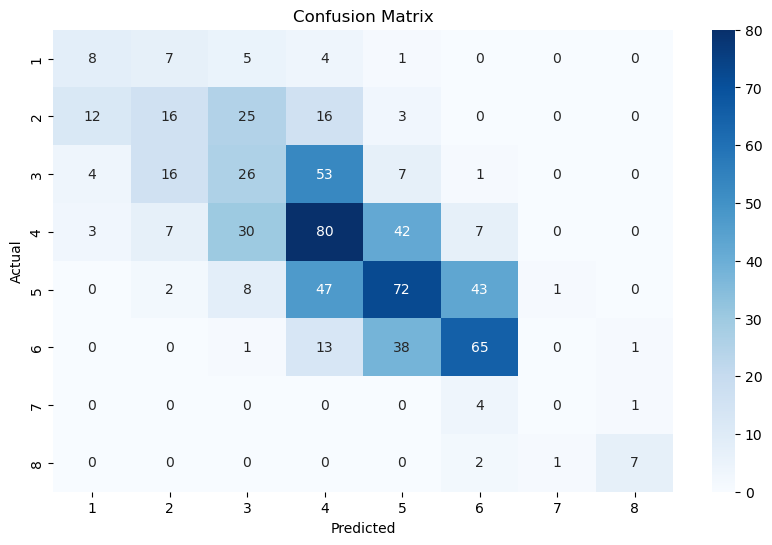

In [43]:
""" 
Lets start with a simple model, Logistic Regression as our baseline model.
"""


# Logistic Regression with statsmodels


X_train_sm = sm.add_constant(X_train_std)
X_test_sm = sm.add_constant(X_test_std)

log_reg_sm = sm.MNLogit(y_train, X_train_sm)

log_reg_sm_fit = log_reg_sm.fit_regularized(method='l1', alpha=0.005, trim_mode='size', maxiter=10000, full_output=True, disp=False)

print(log_reg_sm_fit.summary())

y_pred_sm = log_reg_sm_fit.predict(X_test_sm)
y_pred_sm = np.argmax(y_pred_sm, axis=1)

y_pred_sm = y_pred_sm + 1

Metrics(y_test, y_pred_sm)



### Random Forest

Best parameters for Random Forest Classifier:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest Classifier:  0.4394106813996317
Accuracy  0.39911634756995584
              precision    recall  f1-score   support

           1       0.30      0.24      0.27        25
           2       0.32      0.17      0.22        72
           3       0.32      0.34      0.33       107
           4       0.34      0.41      0.38       169
           5       0.42      0.41      0.41       173
           6       0.54      0.58      0.56       118
           7       1.00      0.00      0.00         5
           8       1.00      0.80      0.89        10

    accuracy                           0.40       679
   macro avg       0.53      0.37      0.38       679
weighted avg       0.40      0.40      0.39       679



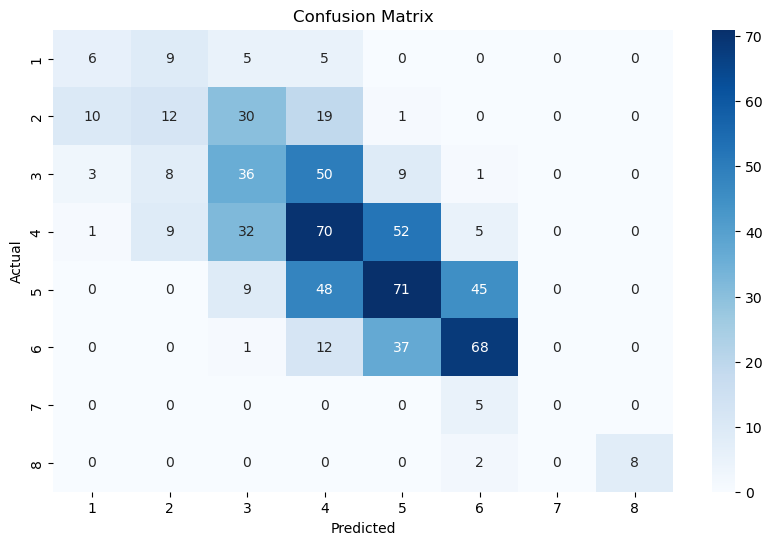

In [44]:
"""
Trying out Random Forest Classifier with Grid Search CV to find the best parameters.

"""

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier: ", grid_search.best_params_)
print("Best score for Random Forest Classifier: ", grid_search.best_score_)

best_params = grid_search.best_params_

best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train_std, y_train)

preds = best_rf_clf.predict(X_test_std)

Metrics(y_test, preds)


Selected features after RFE: Index(['HoursPerWeek', 'TotalHours', 'SelectByHotkeys', 'AssignToHotkeys',
       'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
       'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
       'WorkersMade', 'ComplexAbilitiesUsed'],
      dtype='object')
Accuracy  0.4020618556701031
              precision    recall  f1-score   support

           1       0.26      0.20      0.23        25
           2       0.33      0.18      0.23        72
           3       0.34      0.35      0.34       107
           4       0.35      0.43      0.39       169
           5       0.41      0.41      0.41       173
           6       0.54      0.56      0.55       118
           7       1.00      0.00      0.00         5
           8       1.00      0.80      0.89        10

    accuracy                           0.40       679
   macro avg       0.53      0.37      0.38       679
weighted avg       0.41      0.40      0.40 

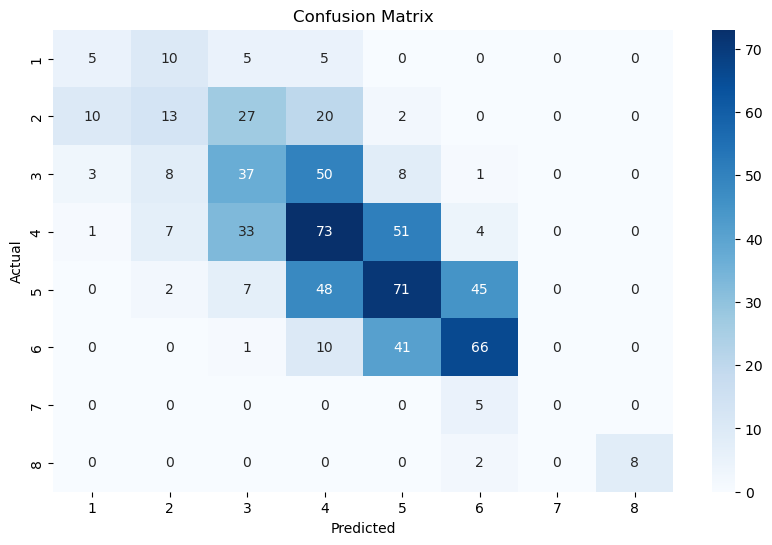

In [45]:
"""
Further fine tuning Random Forest Classifier with recursive feature elimination.
"""

rf_clf = RandomForestClassifier(**best_params, random_state=42)

rfe = RFECV(
    estimator=rf_clf,
    min_features_to_select=1,
    step=1,
    cv = 5,
    n_jobs=-1,
    scoring='accuracy'
)

rfe.fit(X_train_std, y_train)

print("Selected features after RFE:", X_train.columns[rfe.support_])

rf_clf.fit(X_train_std[:, rfe.support_], y_train)

preds = rf_clf.predict(X_test_std[:, rfe.support_])

Metrics(y_test, preds)


### XGBoost

Accuracy  0.42857142857142855
              precision    recall  f1-score   support

           1       0.28      0.28      0.28        25
           2       0.35      0.24      0.28        72
           3       0.36      0.34      0.35       107
           4       0.39      0.46      0.42       169
           5       0.43      0.45      0.44       173
           6       0.55      0.56      0.56       118
           7       1.00      0.00      0.00         5
           8       1.00      1.00      1.00        10

    accuracy                           0.43       679
   macro avg       0.55      0.41      0.42       679
weighted avg       0.43      0.43      0.42       679



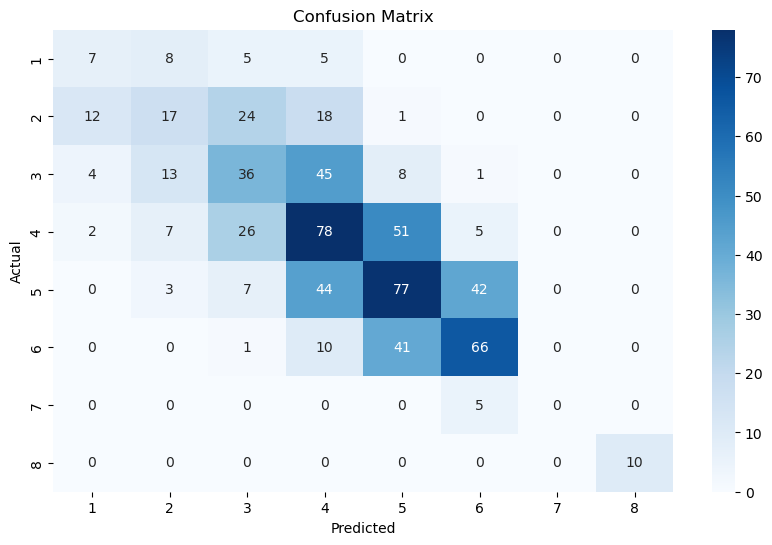

In [46]:
# XGBoost with hyperparameter tuning

# Best Params obtained by GridSearchCV
xgboost = XGBClassifier(max_depth=25, 
                        learning_rate=0.01, 
                        n_estimators=400, 
                        gamma=0.05, 
                        min_child_weight=1, 
                        subsample=0.7, 
                        colsample_bytree=0.5, 
                        reg_alpha=0.008)

xgb_ytrain = y_train - 1

xgboost.fit(X_train_std, xgb_ytrain)

preds = xgboost.predict(X_test_std)
preds = preds + 1

Metrics(y_test, preds)


Q) Hypothetical: after seeing your work, your stakeholders come to you and say that they
can collect more data, but want your guidance before starting. How would you advise
them based on your EDA and model results?



A) Based on our EDA and modeling results, here are a few suggestions:

More Detailed Gameplay Data: The top features in our model are mostly related to the player's actions during the game. If we could collect more detailed data about these actions, such as the types of actions performed or the sequence of actions, that could potentially improve the model. Data like Race Selection, Average Unspent Resources, Time Spent Supply Capped, Resource Collection Rate.

More Data on Less Common Ranks: Our dataset was imbalanced with fewer examples of players with very high or very low ranks. Collecting more data on these players could help the model learn to predict these classes better.

Time Series Data: Starcraft is a real-time strategy game, so the sequence of actions can be very important. If we could collect time-series data about the actions taken by players during the game, that could potentially be very useful.

Meta-Game Data: Information about the game state, such as the number of units or the type of units a player has at different times, could also be useful.